In [171]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


In [172]:
import pickle

# Function to save a DataFrame
def save_dataframe(df, filename):
    """Save a DataFrame to a pickle file."""
    with open(filename, 'wb') as file:
        pickle.dump(df, file)
    print(f"DataFrame saved to {filename}")

# Function to load a DataFrame
def load_dataframe(filename):
    """Load a DataFrame from a pickle file."""
    with open(filename, 'rb') as file:
        df = pickle.load(file)
    print(f"DataFrame loaded from {filename}")
    return df

In [173]:
def missing_values(df):
    # Check and display the count of missing values per column
    missing_counts = df.isnull().sum()
    
    # Filter only columns that have missing values
    missing_counts = missing_counts[missing_counts > 0]
    
    # Display the missing values count
    print("Missing Values Count Per Column:")
    print(missing_counts)


def show_value_counts(df, col_name, top_n=10):
    if col_name not in df.columns:
        print(f"Column '{col_name}' not found in DataFrame.")
        return
    
    print(f"Value counts for column: {col_name}")
    print(df[col_name].value_counts().head(top_n))

def missing_stats(df):
    # Calculate missing values statistics
    print(pd.DataFrame({
        'Missing Count': df.isna().sum(),  # Count of NaN values per column
        'Total Rows': len(df),  # Total number of rows
        'Missing Percentage': (df.isna().sum() / len(df)) * 100  # Percentage of NaN per column
    }))


In [174]:

def convert_LabelEncoder(df, column_name):
    # Initialize the LabelEncoder
    le = LabelEncoder()
    # Fit and transform the column and update the DataFrame column
    df[column_name] = le.fit_transform(df[column_name])
    return df[column_name]



In [175]:
# Load CSV
df = pd.read_csv(r"C:\Users\oferg\Desktop\DS\ML-Project\dataframe.csv")


In [176]:
df.shape

(53949, 34)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       53949 non-null  object 
 1   Season       53949 non-null  object 
 2   Stage        53949 non-null  object 
 3   Player       53949 non-null  object 
 4   Team         53938 non-null  object 
 5   GP           53949 non-null  int64  
 6   MIN          53949 non-null  float64
 7   FGM          53949 non-null  int64  
 8   FGA          53949 non-null  int64  
 9   3PM          53949 non-null  int64  
 10  3PA          53949 non-null  int64  
 11  FTM          53949 non-null  int64  
 12  FTA          53949 non-null  int64  
 13  TOV          53949 non-null  int64  
 14  PF           53949 non-null  int64  
 15  ORB          53949 non-null  int64  
 16  DRB          53949 non-null  int64  
 17  REB          53949 non-null  int64  
 18  AST          53949 non-null  int64  
 19  STL 

In [178]:
df.describe()

GP            MIN           FGM           FGA           3PM      \
count  53949.000000  53949.000000  53949.000000  53949.000000  53949.000000   
mean      30.313574    752.431404    113.200541    245.094942     28.468535   
std       17.849616    534.216679    100.164033    212.155076     30.673395   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.000000    380.900000     48.000000    109.000000      6.000000   
50%       29.000000    663.000000     89.000000    196.000000     20.000000   
75%       37.000000    954.000000    145.000000    310.000000     41.000000   
max       85.000000   3485.000000    978.000000   2173.000000    402.000000   

            3PA           FTM           FTA           TOV          PF       \
count  53949.000000  53949.000000  53949.000000  53949.000000  53949.00000   
mean      80.738383     56.297299     76.012716     47.260487     70.10104   
std       80.672208     59.240650     76.172698     37.398461     45.62977   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%       20.000000     20.000000     28.000000     21.000000     37.00000   
50%       61.000000     40.000000     56.000000     39.000000     64.00000   
75%      117.000000     73.000000     99.000000     63.000000     91.00000   
max     1028.000000    756.000000    972.000000    464.000000    371.00000   

            ORB           DRB           REB           AST           STL      \
count  53949.000000  53949.000000  53949.000000  53949.000000  53949.000000   
mean      34.325048     90.601216    124.926264     62.786910     26.715398   
std       37.003235     84.629100    117.293566     73.184287     22.077459   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000     37.000000     50.000000     20.000000     11.000000   
50%       23.000000     68.000000     93.000000     41.000000     21.000000   
75%       44.000000    114.000000    159.000000     78.000000     36.000000   
max      440.000000    894.000000   1247.000000    925.000000    225.000000   

            BLK           PTS       birth_year     height_cm      weight     \
count  53949.000000  53949.000000  53631.000000  53875.000000  49385.000000   
mean      10.492057    311.178372   1986.361675    197.445123    210.309527   
std       18.199867    271.811590      6.637023      8.728587     26.128059   
min        0.000000      0.000000   1961.000000    160.000000    130.000000   
25%        1.000000    134.000000   1982.000000    191.000000    190.000000   
50%        4.000000    247.000000   1987.000000    198.000000    209.000000   
75%       12.000000    399.000000   1991.000000    203.000000    229.000000   
max      307.000000   2832.000000   2004.000000    229.000000    375.000000   

         weight_kg    draft_round   draft_pick   
count  49385.000000  10136.000000  10136.000000  
mean      95.422193      1.387530     14.053177  
std       11.851299      0.508224      8.643064  
min       59.000000      1.000000      1.000000  
25%       86.000000      1.000000      6.000000  
50%       95.000000      1.000000     13.000000  
75%      104.000000      2.000000     22.000000  
max      170.000000      7.000000     30.000000

# Data Protocol

In [180]:
# Type of values
df.dtypes.to_excel("df_datatype.xlsx", sheet_name='data_type')

# Maximum values (only numeric columns)
df.select_dtypes(include=['number']).max().to_excel("max_df.xlsx", sheet_name='max')

# Minimum values (only numeric columns)
df.select_dtypes(include=['number']).min().to_excel("min_df.xlsx", sheet_name='min')

# Missing values
df.isnull().sum(axis=0).to_excel("NA_df.xlsx", sheet_name='NA')

# Unique values count
df.nunique().to_excel("unique_df.xlsx", sheet_name='unique')

print("Excel files exported successfully.")


Excel files exported successfully.


# Missing Data

In [182]:
missing_stats(df)

             Missing Count  Total Rows  Missing Percentage
League               0         53949          0.000000    
Season               0         53949          0.000000    
Stage                0         53949          0.000000    
Player               0         53949          0.000000    
Team                11         53949          0.020390    
GP                   0         53949          0.000000    
MIN                  0         53949          0.000000    
FGM                  0         53949          0.000000    
FGA                  0         53949          0.000000    
3PM                  0         53949          0.000000    
3PA                  0         53949          0.000000    
FTM                  0         53949          0.000000    
FTA                  0         53949          0.000000    
TOV                  0         53949          0.000000    
PF                   0         53949          0.000000    
ORB                  0         53949          0.000000  

# Descriptive Statistics

Shape of your Data Set loaded: (53949, 34)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  16
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  3
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    34 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
7 numeric variables in data exceeds limit, taking top 30 variables
    List of variables se

Number of All Scatter Plots = 28


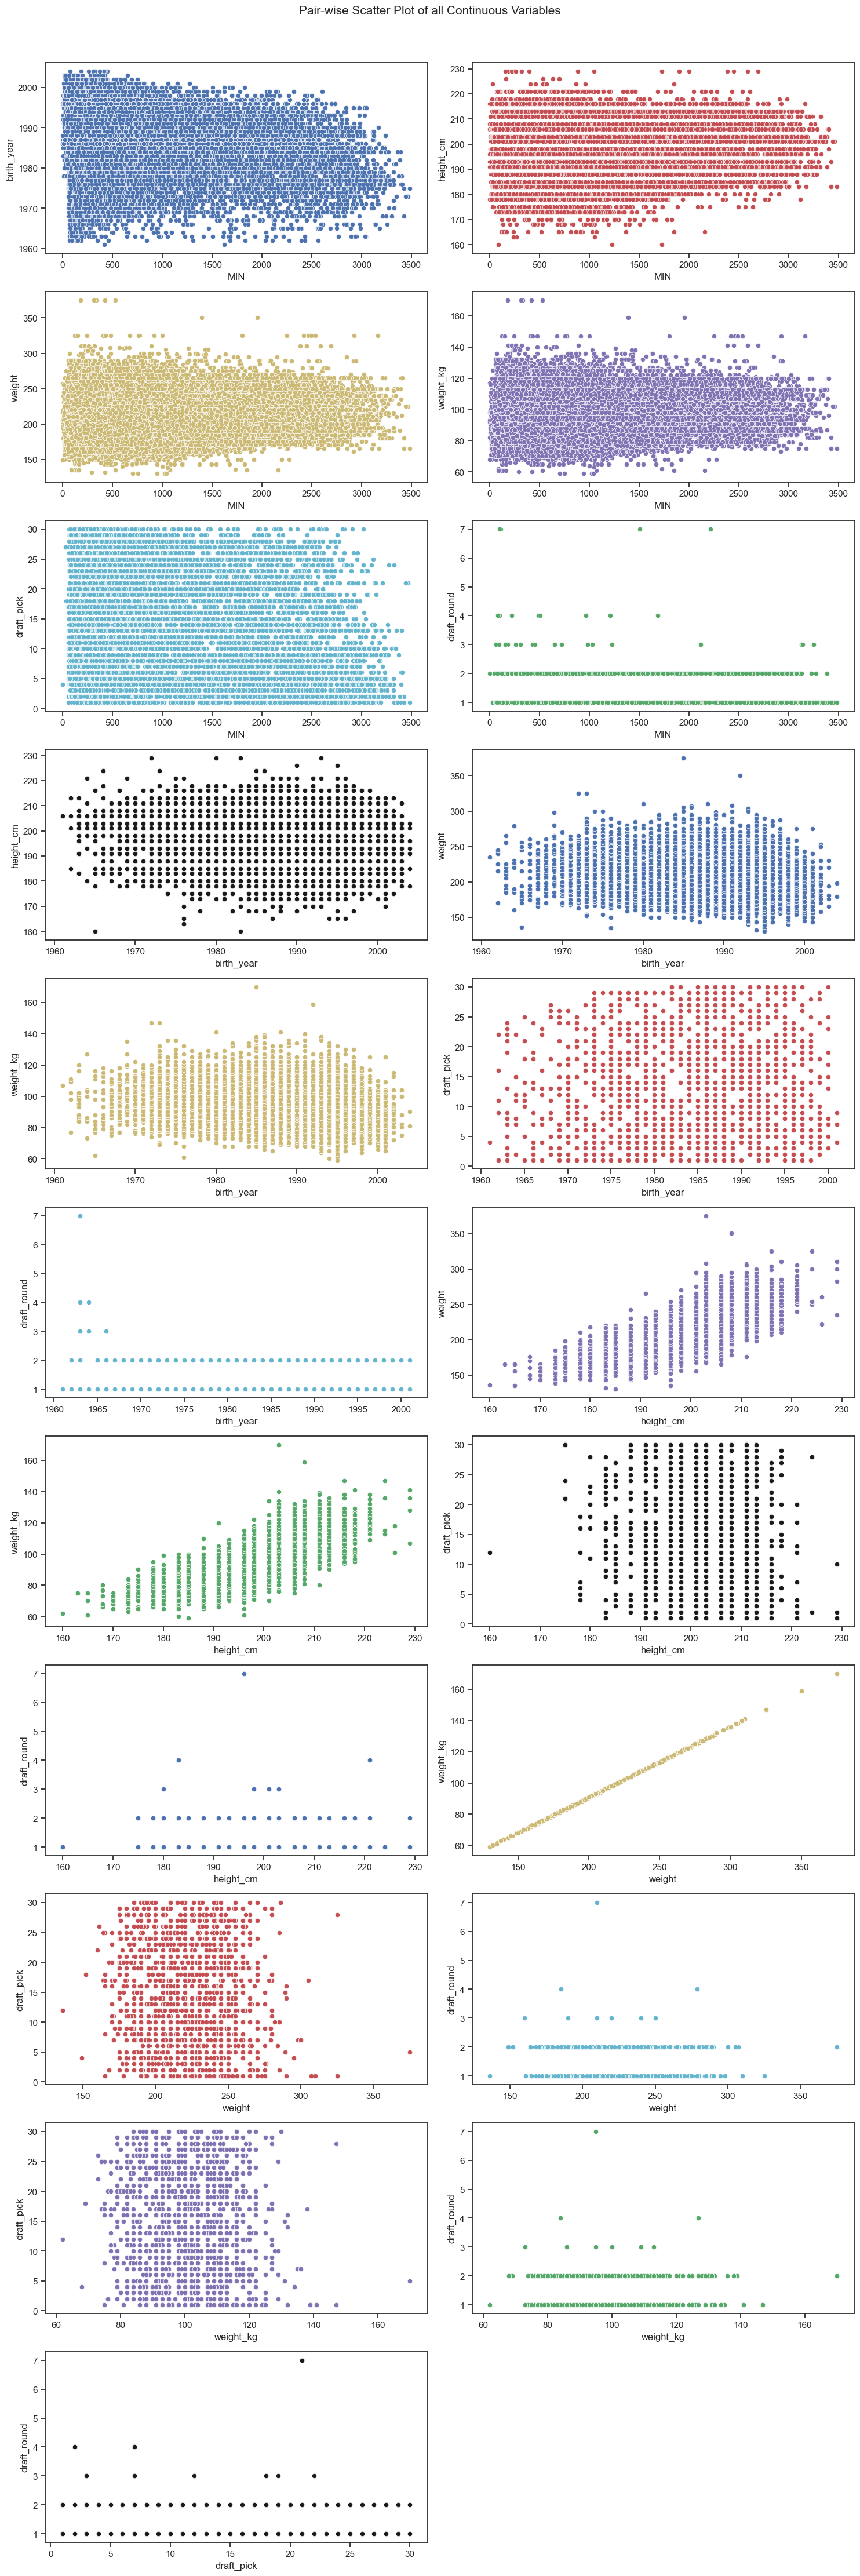

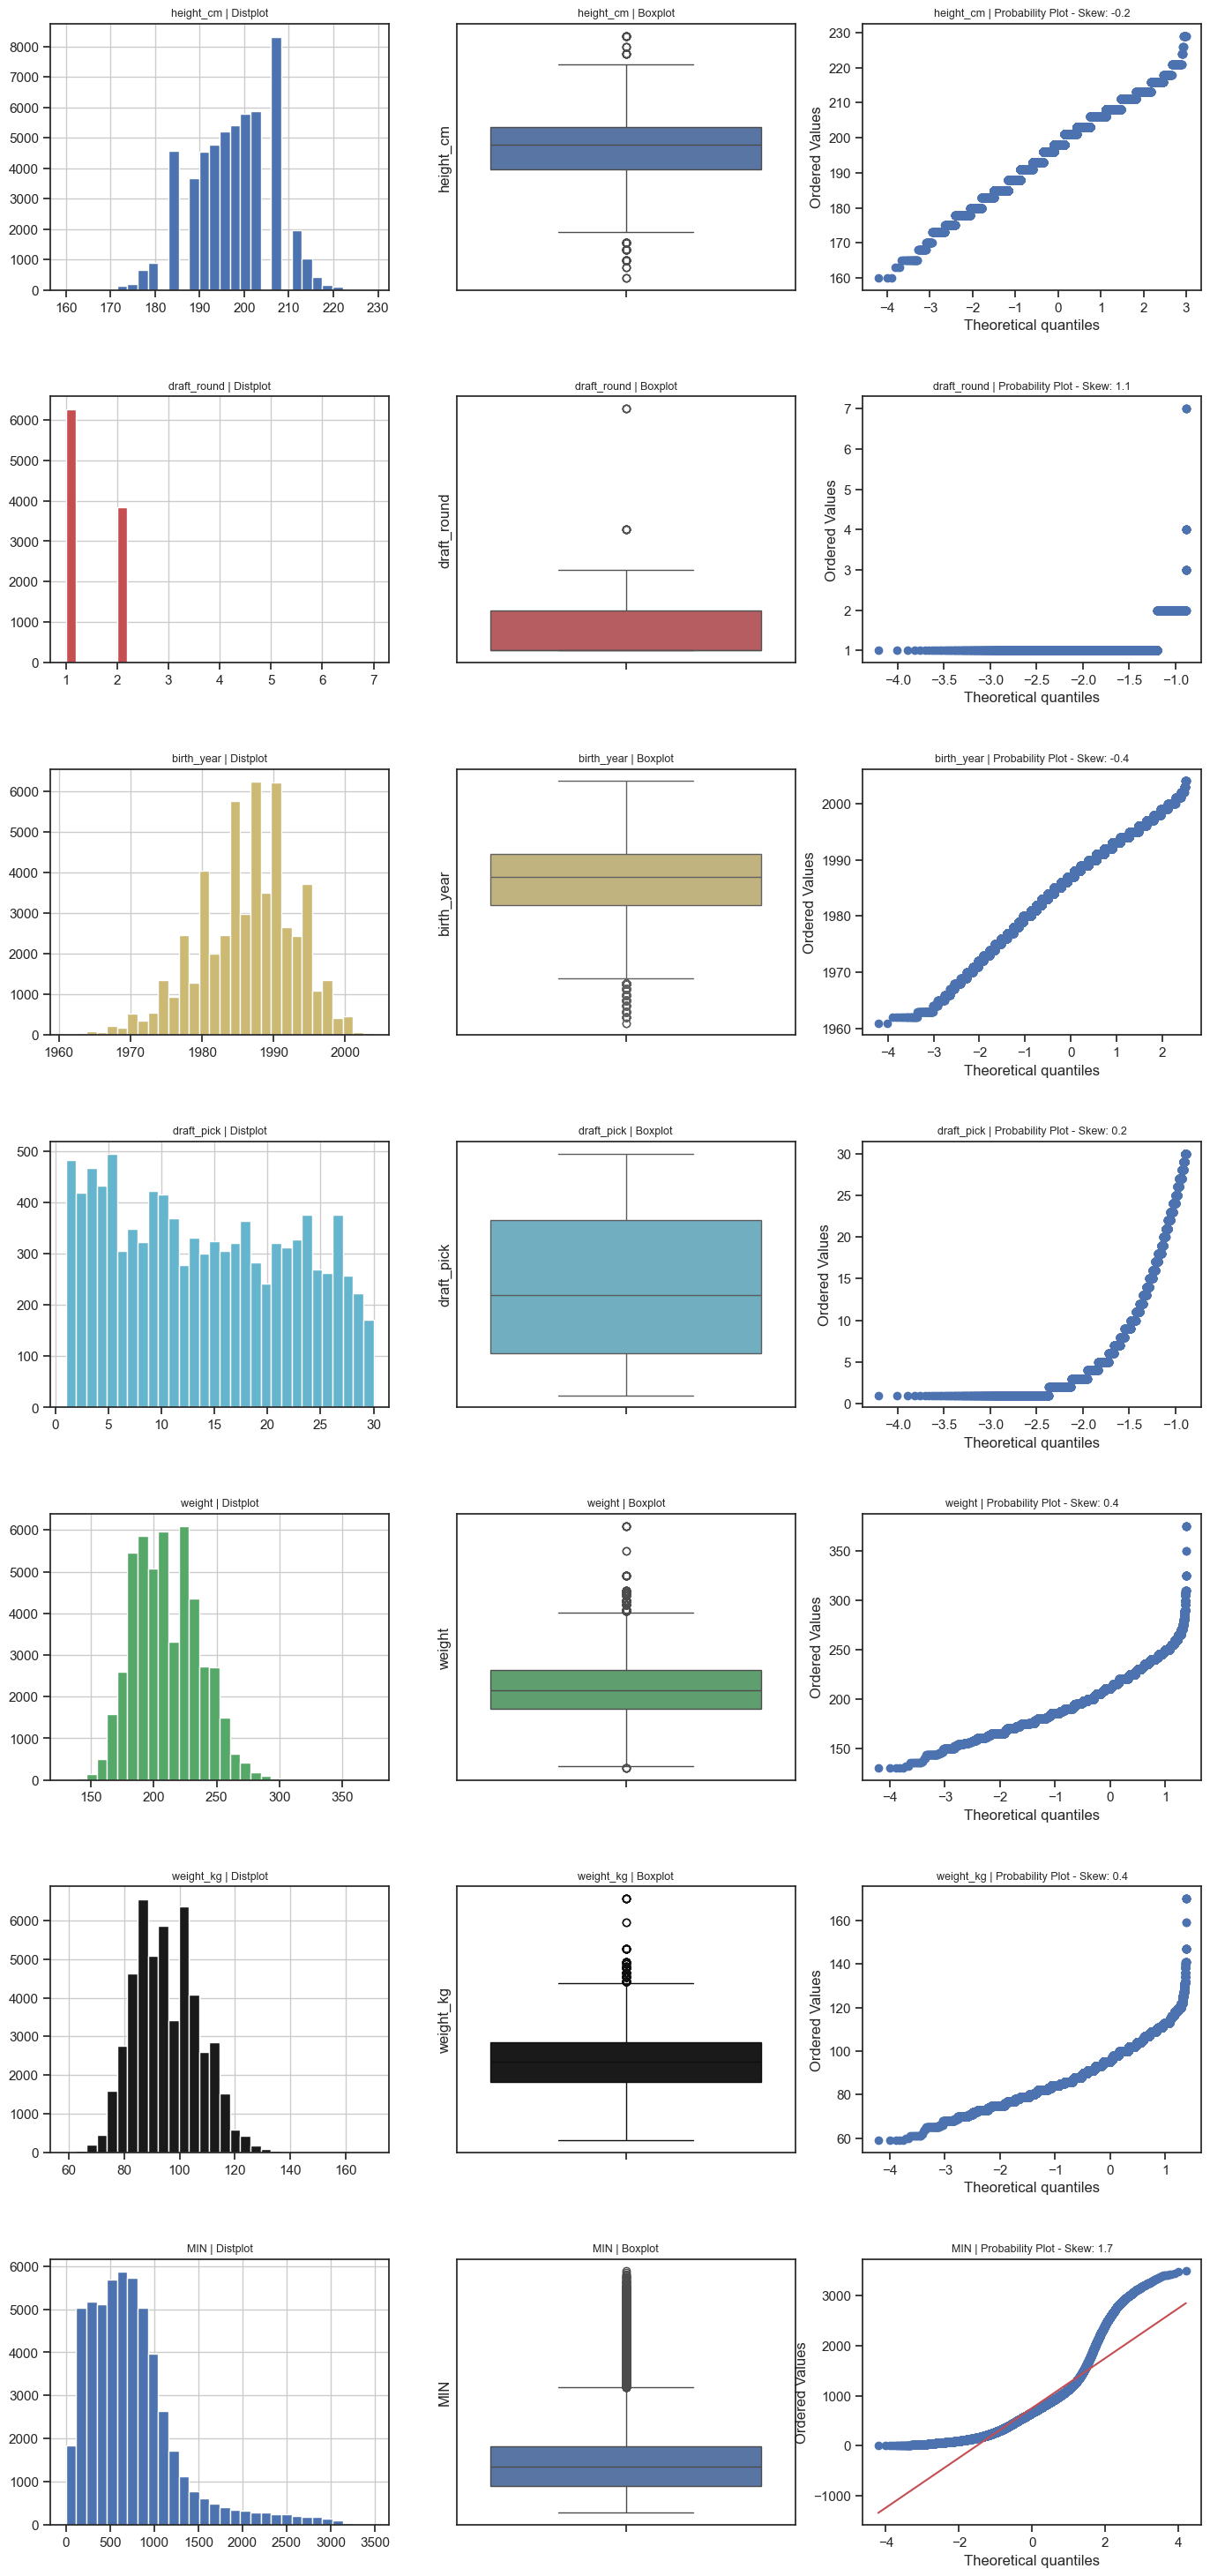

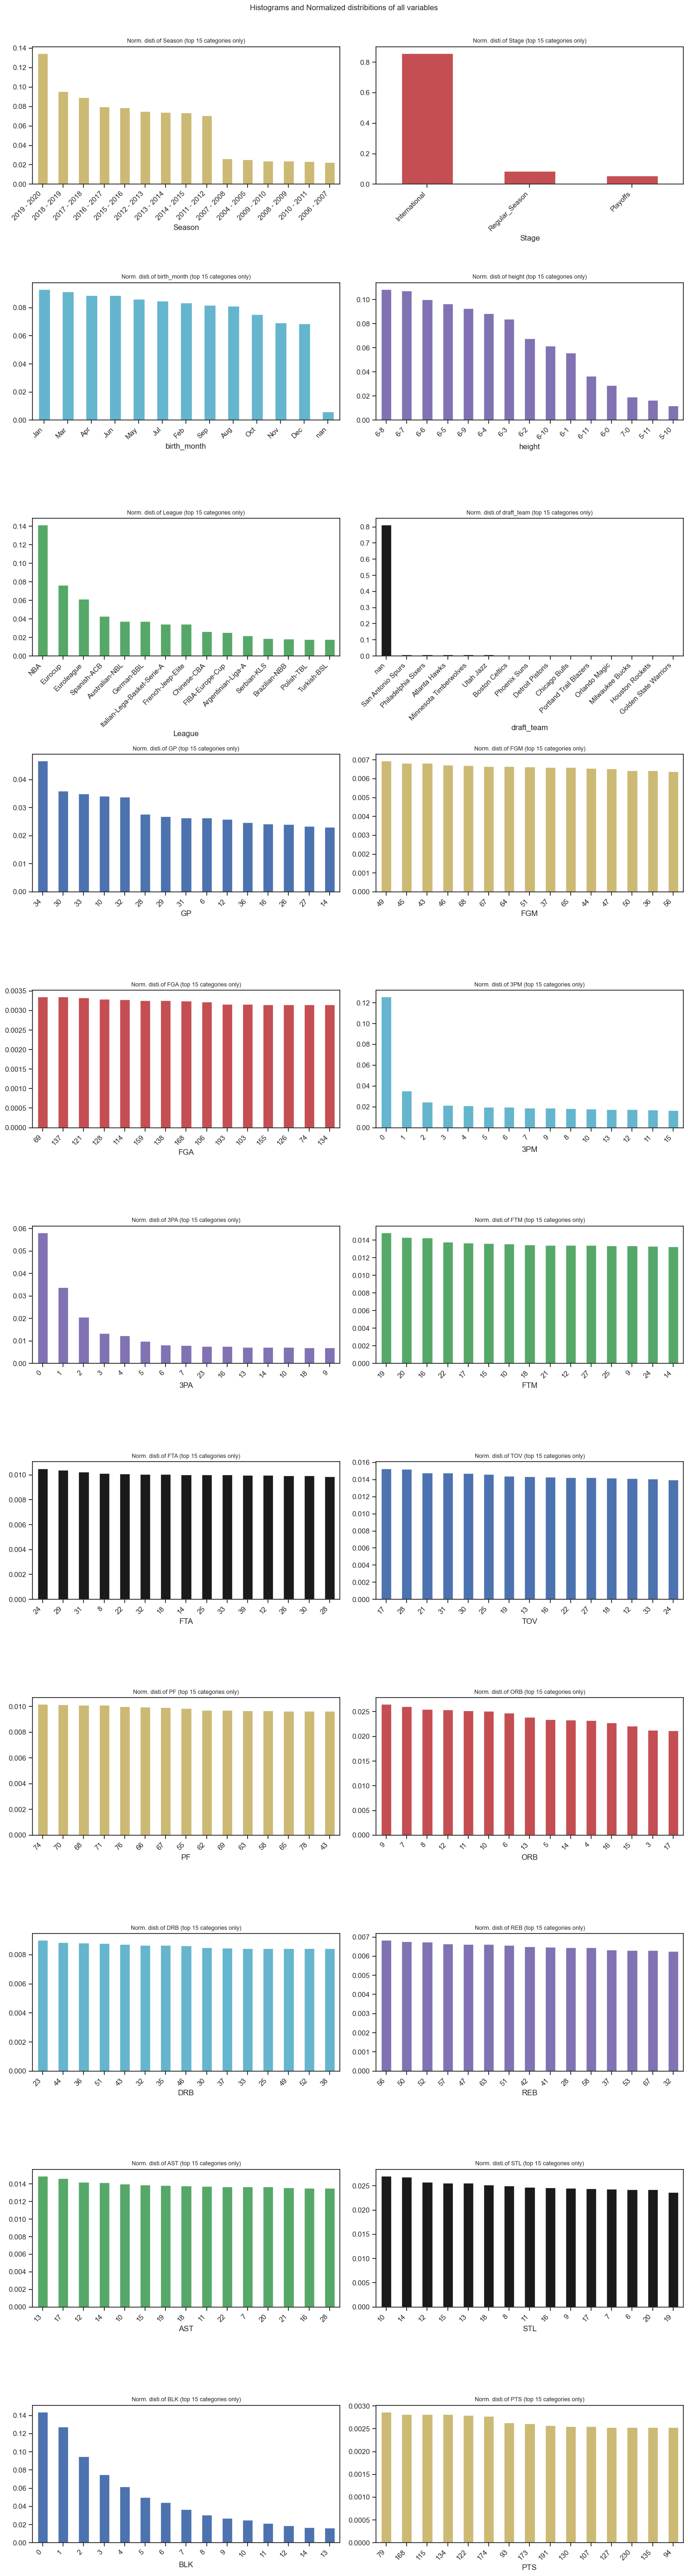

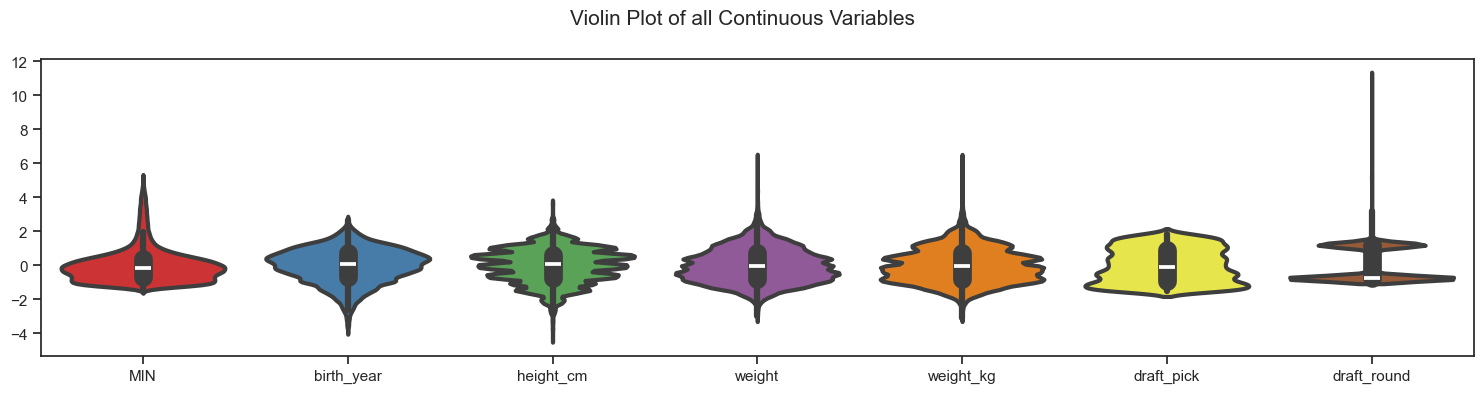

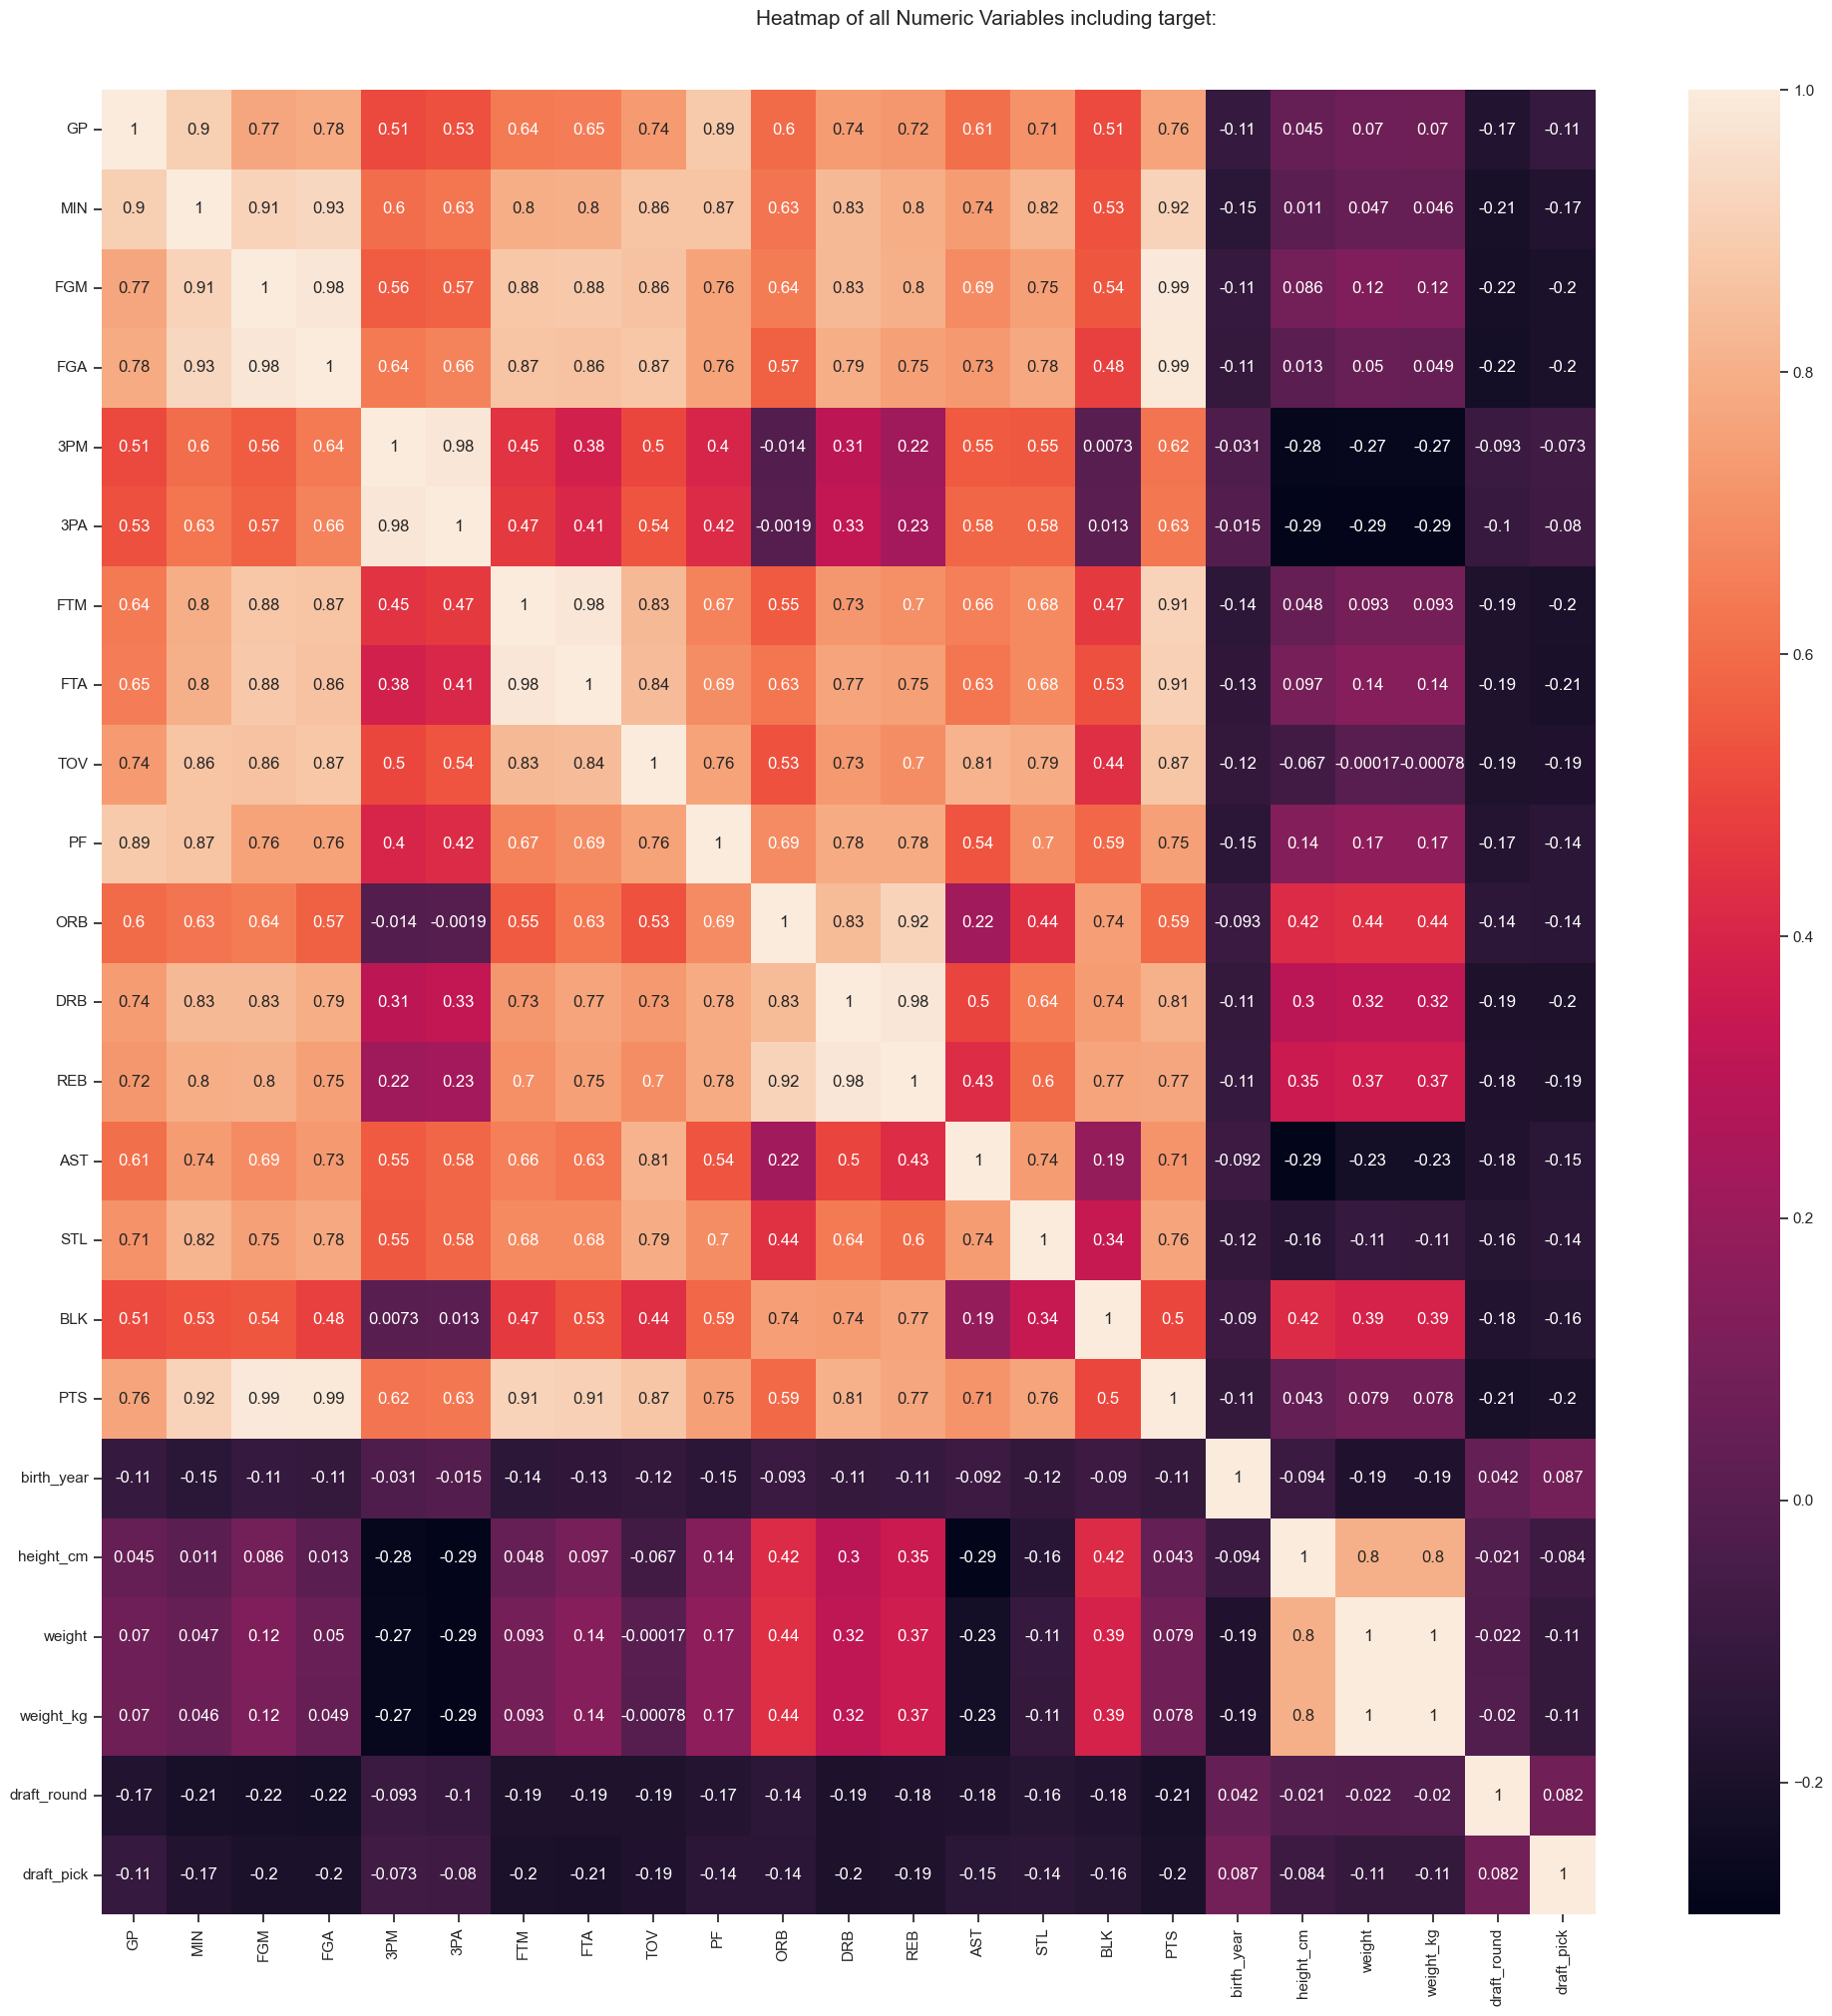

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\oferg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\oferg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\oferg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\oferg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\oferg\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for Player. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for birth_date. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for high_school. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: h

League            Season         Stage       \
0                        NBA  1999 - 2000  Regular_Season   
1                        NBA  1999 - 2000  Regular_Season   
2                        NBA  1999 - 2000  Regular_Season   
3                        NBA  1999 - 2000  Regular_Season   
4                        NBA  1999 - 2000  Regular_Season   
...                      ...          ...             ...   
53944  Ukrainian-Superleague  2019 - 2020   International   
53945  Ukrainian-Superleague  2019 - 2020   International   
53946  Ukrainian-Superleague  2019 - 2020   International   
53947  Ukrainian-Superleague  2019 - 2020   International   
53948  Ukrainian-Superleague  2019 - 2020   International   

             Player         Team  GP    MIN   FGM   FGA  3PM  3PA  FTM  FTA  \
0         Shaquille O'Neal   LAL  79  3163.0  956  1665    0    1  432  824   
1             Vince Carter   TOR  82  3126.0  788  1696   95  236  436  551   
2              Karl Malone   UTA  82  2947.0  752  1476    2    8  589  739   
3            Allen Iverson   PHI  70  2853.0  729  1733   89  261  442  620   
4              Gary Payton   SEA  82  3425.0  747  1666  177  520  311  423   
...                    ...   ...  ..     ...  ...   ...  ...  ...  ...  ...   
53944  Kyrylo Meshheryakov   MYK  15   127.0    7    28    2   13    3    4   
53945    Yaroslav Kadygrob   ODE  10    81.7    5    16    4   14    1    3   
53946      Ernesto Tkachuk   ODE  16   124.7    1    15    0   11    7   14   
53947    Andrij Shapovalov  KHAR  12    59.2    0     8    0    7    3    6   
53948    Dmitriy Lypovtsev  KHAR   5    86.3    1    13    0    9    0    0   

       TOV  PF   ORB  DRB   REB  AST  STL  BLK   PTS  birth_year birth_month  \
0      223  255  336  742  1078  299   36  239  2344    1972.0        Mar      
1      178  263  150  326   476  322  110   92  2107    1977.0        Jan      
2      231  229  169  610   779  304   79   71  2095    1963.0        Jul      
3      230  162   71  196   267  328  144    5  1989    1975.0        Jun      
4      224  178  100  429   529  732  153   18  1982    1968.0        Jul      
...    ...  ...  ...  ...   ...  ...  ...  ...   ...         ...         ...   
53944    5   27    4   14    18    8    1    3    19    1995.0        Aug      
53945    3    2    2    4     6    3    0    0    15    1991.0        Oct      
53946   11   12    0   15    15   10    6    1     9    1994.0        Sep      
53947    5    6    1    4     5    3    1    0     3    1993.0        Nov      
53948    7   11    2   12    14    4    2    1     2    1986.0        Oct      

        birth_date  height  height_cm  weight  weight_kg  nationality    \
0       Mar 6, 1972   7-1     216.0     325.0    147.0    United States   
1      Jan 26, 1977   6-6     198.0     220.0    100.0    United States   
2      Jul 24, 1963   6-9     206.0     265.0    120.0    United States   
3       Jun 7, 1975   6-0     183.0     165.0     75.0    United States   
4      Jul 23, 1968   6-4     193.0     180.0     82.0    United States   
...             ...    ...        ...     ...        ...            ...   
53944  Aug 17, 1995   6-6     198.0     182.0     83.0          Ukraine   
53945  Oct 28, 1991   6-3     191.0     187.0     85.0          Ukraine   
53946  Sep 17, 1994   6-2     188.0     200.0     91.0          Ukraine   
53947  Nov 10, 1993   6-2     188.0     171.0     78.0          Ukraine   
53948  Oct 10, 1986   6-8     203.0     220.0    100.0          Ukraine   

              high_school           draft_round  draft_pick  \
0      Robert G. Cole High School       1.0          1.0      
1             Mainland High School      1.0          5.0      
2          Summerfield High School      1.0         13.0      
3              Bethel High School       1.0          1.0      
4              Skyline High School      1.0          2.0      
...                            ...          ...         ...   
53944                        

In [184]:
# Install AutoViz if not installed
# !pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd
%matplotlib inline

# Initialize AutoViz
AV = AutoViz_Class()

# Load DataFrame before passing to AutoViz
#filename = r'C:\Users\oferg\Desktop\DS\ML-Project\dataframe.csv'
#sep = ','  # Adjust if needed (e.g., use '\t' for tab-separated values)

# Load CSV into a DataFrame
#df = pd.read_csv(filename, sep=sep)

# Apply AutoViz
AV.AutoViz(filename="", dfte=df)


# Clean Text

In [186]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean a string by lowercasing, removing punctuation/special characters, extra spaces, and stop words."""
    # Check if input is a string
    if not isinstance(text, str):
        return text

    original_text = text  # store the original for printing

    # Normalize text: lowercase
    text = text.lower()

    # Remove punctuation and special characters (keep letters, numbers, and whitespace)
    text = re.sub(r'[^a-z0-9\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stop words
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)

    # Print before and after cleaning if there's a change
    #if original_text != cleaned_text:
    #    print("Original:", original_text, "=> Cleaned:", cleaned_text)
    
    return cleaned_text

def clean_text_column(df, column_name):
    """
    Cleans the text in the specified column of a DataFrame.
    
    For each row in the column, prints the original and cleaned text,
    then updates the DataFrame with the cleaned text.
    """
    df[column_name] = df[column_name].apply(clean_text)
    return df

string_columns = df.select_dtypes(include=['object','string']).columns.tolist()
#print(string_columns)
for column_name in string_columns: 
    # Clean the 'text' column
    df = clean_text_column(df,column_name )



# Transform/Manipulate data

In [188]:
# Convert 'birth_date' to datetime format
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate the median date (ignoring NaN values)
median_birth_date = df['birth_date'].median()

# Fill NaN values in 'birth_date' with the median date
df['birth_date'] = df['birth_date'].fillna(median_birth_date)


# Extract the year from 'birth_date' and fill missing values in 'birth_year'
df['birth_year'] = df['birth_year'].fillna(df['birth_date'].dt.year)

# Mapping for month names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Reverse mapping for numbers back to month names
reverse_month_map = {v: k for k, v in month_map.items()}

# Step 1: Convert month names to numbers
df['birth_month'] = df['birth_month'].map(month_map).fillna(df['birth_month'])

# Step 2: Convert birth_month to numeric (handling any remaining strings)
df['birth_month'] = pd.to_numeric(df['birth_month'], errors='coerce')

# Step 3: Fill missing values using the month extracted from 'birth_date'
df['birth_month'] = df['birth_month'].fillna(df['birth_date'].dt.month)

df.drop('birth_date', axis=1, inplace=True)


In [189]:
df = df.drop(['height', 'weight'], axis=1)

def get_position(row):
    height = row['height_cm']
    weight = row['weight_kg']
    
    # Try to assign using both height and weight based on the table:
    # Note: Weight ranges in kg approximate the lbs ranges given.
    # Center: Height >= 208 cm and Weight >= 109 kg
    if height >= 208 and weight >= 109:
        return 'Center'
    # Power Forward (PF): Height 203-211 cm and Weight 100-118 kg
    elif 203 <= height <= 211 and 100 <= weight <= 118:
        return 'PF'
    # Small Forward (SF): Height 198-206 cm and Weight 95-104 kg
    elif 198 <= height <= 206 and 95 <= weight <= 104:
        return 'SF'
    # Shooting Guard (SG): Height 191-198 cm and Weight 86-95 kg
    elif 191 <= height <= 198 and 86 <= weight <= 95:
        return 'SG'
    # Point Guard (PG): Height 178-191 cm and Weight 75-86 kg
    elif 178 <= height <= 191 and 75 <= weight <= 86:
        return 'PG'
    else:
        # Fallback using height only:
        if height >= 208:
            return 'Center'
        elif height >= 203:
            return 'PF'
        elif height >= 198:
            return 'SF'
        elif height >= 191:
            return 'SG'
        elif height >= 178:
            return 'PG'
        else:
            return 'Unknown'

# Example usage on your DataFrame:
df['Position'] = df.apply(get_position, axis=1)

# Display the first few rows to verify the results
print(df[['height_cm', 'weight_kg', 'Position']].head())


   height_cm  weight_kg Position
0    216.0      147.0    Center 
1    198.0      100.0        SF 
2    206.0      120.0        PF 
3    183.0       75.0        PG 
4    193.0       82.0        SG 


In [190]:
df = df.astype({col: 'string' for col in ['Player','Team','draft_team','high_school']})

In [191]:

#Overall Position=(Round−1)×30+Pick in Round
mask = df['draft_round'].notna() & df['draft_pick'].notna()
df.loc[mask, 'draft_position'] = (df.loc[mask, 'draft_round'] - 1) * 30 + df.loc[mask, 'draft_pick']
df['draft_position'] = df['draft_position'].fillna(0)

#drop columns
df = df.drop(['REB', 'PTS','draft_pick','draft_round'], axis=1)
#REB=ORB+DRB
#PTS=FGM+3PM+FTM
#height=height_cm
#weight=weight_kg
#df['NBA'] = (df['draft_position'] > 0).astype(int)

# Option using .loc with a case-insensitive comparison:
df.loc[df['League'].str.lower() != 'nba', 'League'] = 'Other'
df['NBA'] = (df['League'] == 'nba').astype(int)


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53949 entries, 0 to 53948
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   League          53949 non-null  object 
 1   Season          53949 non-null  object 
 2   Stage           53949 non-null  object 
 3   Player          53949 non-null  string 
 4   Team            53938 non-null  string 
 5   GP              53949 non-null  int64  
 6   MIN             53949 non-null  float64
 7   FGM             53949 non-null  int64  
 8   FGA             53949 non-null  int64  
 9   3PM             53949 non-null  int64  
 10  3PA             53949 non-null  int64  
 11  FTM             53949 non-null  int64  
 12  FTA             53949 non-null  int64  
 13  TOV             53949 non-null  int64  
 14  PF              53949 non-null  int64  
 15  ORB             53949 non-null  int64  
 16  DRB             53949 non-null  int64  
 17  AST             53949 non-null 

# Data Cleansing

In [194]:
# Fill missing values in the 'Team' column with 'team_name' + index
df['Team'] = df['Team'].fillna(df.index.to_series().apply(lambda i: f'team_name{i}'))
df['draft_team'] = df['draft_team'].fillna('N/A')
df['high_school'] = df['high_school'].fillna('N/A')
df['nationality'] = df['high_school'].fillna('N/A')

In [ ]:
from sklearn.impute import KNNImputer
imp_cols = ['height_cm','weight_kg']
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(df[imp_cols]), columns=imp_cols)
df[imp_cols] = imputed_data

df['BMI'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)


In [ ]:
save_dataframe(df,'Feature Engineering')
#df=load_dataframe('Feature Engineering')
df.info()

# Feature Engineering & Feature Selection

In [ ]:
from IPython.core.display import display, HTML

# Display scrollable output for Manu Ginobili after grouping
#display(HTML(df[df['Player'] == 'manu ginobili'].to_html(
#    notebook=True, escape=False, max_rows=500, max_cols=50, border=1
#)))

# Filter only Regular_Season and Playoffs
df_filtered = df[df['Stage'].isin(['regularseason', 'playoffs'])]

# Define the groupby columns (these should remain unchanged)
groupby_cols = [
    'League', 'Season','Player', 'Team', 'birth_year', 'birth_month',
    'height_cm', 'weight_kg', 'nationality', 'high_school',
    'draft_position', 'draft_team','Position','BMI','NBA'
]

# Perform groupby and sum the numeric columns
df_merged = df_filtered.groupby(groupby_cols, as_index=False).sum(numeric_only=True)

# Set the stage as "NBA Season" for merged data
df_merged['Stage'] = 'NBA Season'

# Remove original Regular_Season & Playoffs rows from df
df = df[~df['Stage'].isin(['regularseason', 'playoffs'])]

# Append the updated (merged) data to df
df = pd.concat([df, df_merged], ignore_index=True)

'''
# Display scrollable output for Manu Ginobili after grouping
display(HTML(df[df['Player'] == 'manu ginobili'].to_html(
    notebook=True, escape=False, max_rows=500, max_cols=50, border=1
)))
'''

In [ ]:
print(missing_stats(df))

# One-Hot Encoding

In [ ]:
#print(df['NBA'].value_counts())

df['League'] = df['League'].astype('category')
df['League']=convert_LabelEncoder(df,'League')
#print(df['League'].value_counts())


df['Season'] = df['Season'].astype('category')
df['Season']=convert_LabelEncoder(df,'Season')
#print(df['Season'].value_counts())

df['Stage'] = df['Stage'].astype('category')
df['Stage']=convert_LabelEncoder(df,'Stage')
#print(df['Stage'].value_counts())

df['nationality'] = df['nationality'].astype('category')
df['nationality']=convert_LabelEncoder(df,'nationality')
#print(df['nationality'].value_counts())


df['Position'] = df['Position'].astype('category')
df['Position']=convert_LabelEncoder(df,'Position')
#print(df['Position'].value_counts())


df['Team'] = df['Team'].astype('category')
df['Team']=convert_LabelEncoder(df,'Position')
#print(df['Team'].value_counts())

        

In [ ]:
missing_stats(df)

In [ ]:
df.info()

In [ ]:
save_dataframe(df, 'dataframe_ready')
df_model = df.select_dtypes(include=['number'])
df_model = df_model.drop(columns=['NBA'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model, df.NBA, test_size=0.35, random_state=47)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Calculate confusion matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)


In [ ]:
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
accuracy

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print(confusion_matrix(y_test, pred))